In [1]:
import torch.nn as nn
import torch.nn.functional as F
from fbm_dropout.fbm_dropout import DropoutFBM

class DenseNetFBM(nn.Module):

    def __init__(self, hidden_sizes, n_agents, max_epoch, grid_sizes, device=None, dtype=None):

        super().__init__()
        
        self.linear_1 = nn.Linear(28*28, hidden_sizes[0], device=device, dtype=dtype)
        self.linear_2 = nn.Linear(hidden_sizes[0], hidden_sizes[1], device=device, dtype=dtype)
        self.linear_3 = nn.Linear(hidden_sizes[1], 10, device=device, dtype=dtype)
        self.dropout_1 = DropoutFBM(0.9, n_agents[0], max_epoch, grid_sizes[0], show=True, device=device, dtype=dtype)
        self.dropout_2 = DropoutFBM(0.9, n_agents[1], max_epoch, grid_sizes[1], show=True, device=device, dtype=dtype)

    def forward(self, input, current_epoch):

        if self.training:
            output = F.relu(self.dropout_1(self.linear_1(input), current_epoch))
            output = F.relu(self.dropout_2(self.linear_2(output), current_epoch))
        else:
            output = F.relu(self.linear_1(input))
            output = F.relu(self.linear_2(output))
            
        output = self.linear_3(output)
        
        return output

In [2]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST('~/datasets', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('~/datasets', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
import torch.optim as optim

hidden_sizes = [256, 64]
max_epochs = 1
grid_sizes = [(16,16), (8,8)]
n_agents = [1, 1]
device='cuda'

model_fbm_dropout = DenseNetFBM(hidden_sizes, n_agents, max_epochs * 1000, grid_sizes, device=device)
optimizer_fbm_dropout = optim.Adam(model_fbm_dropout.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

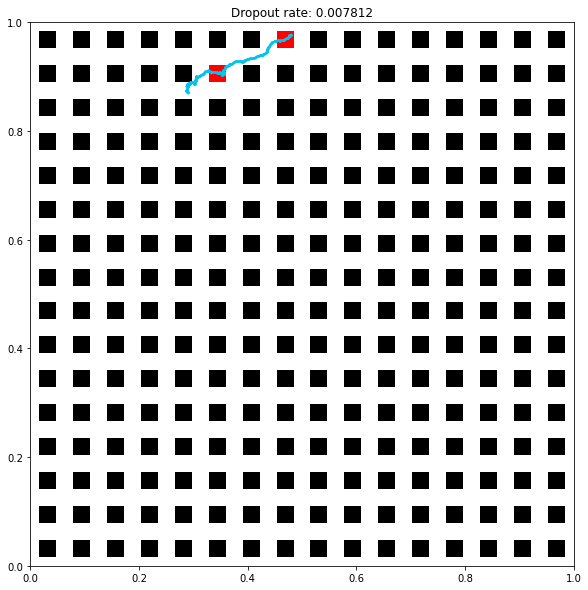

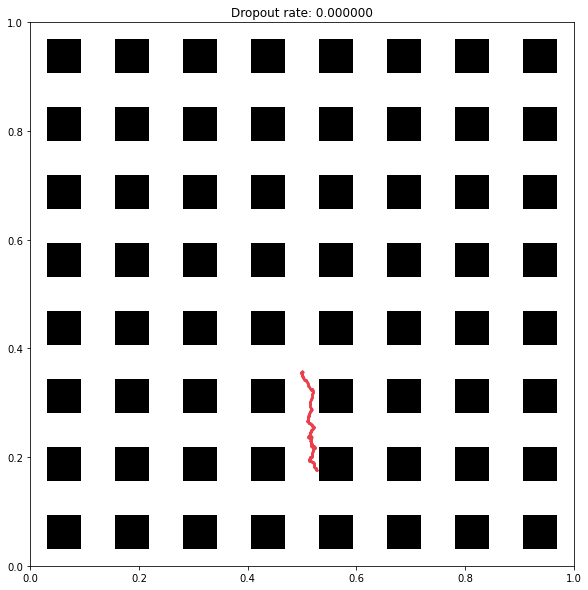

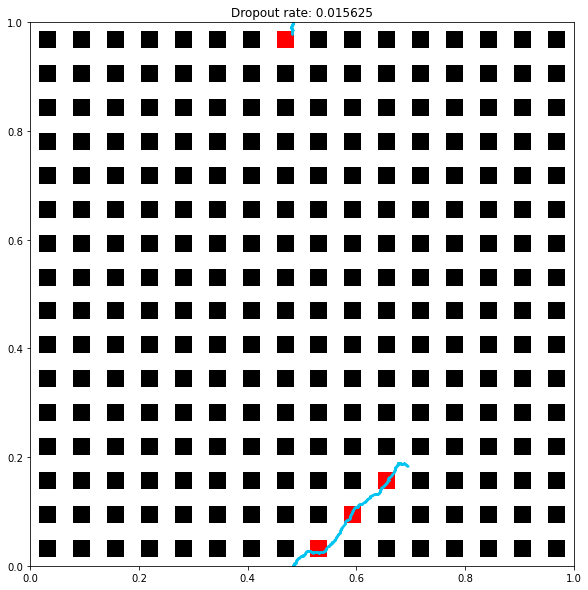

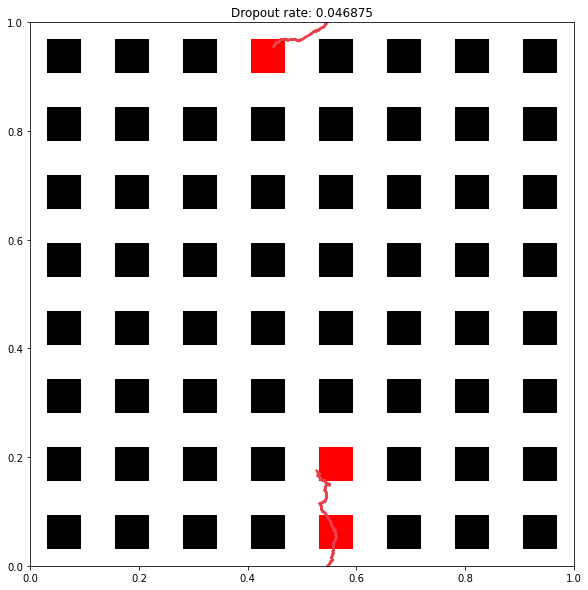

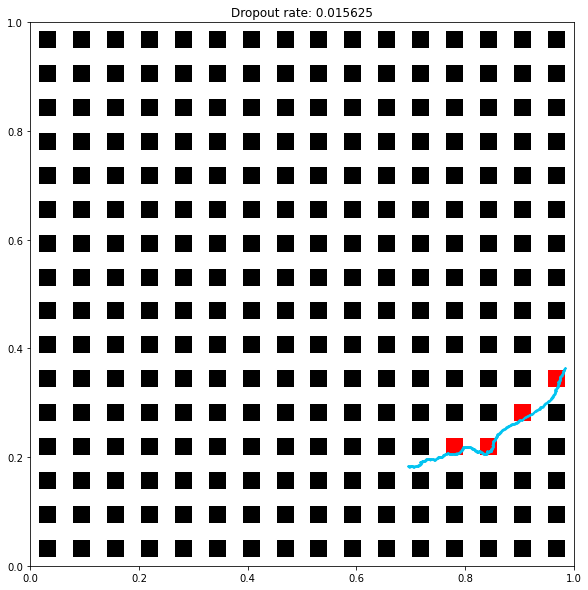

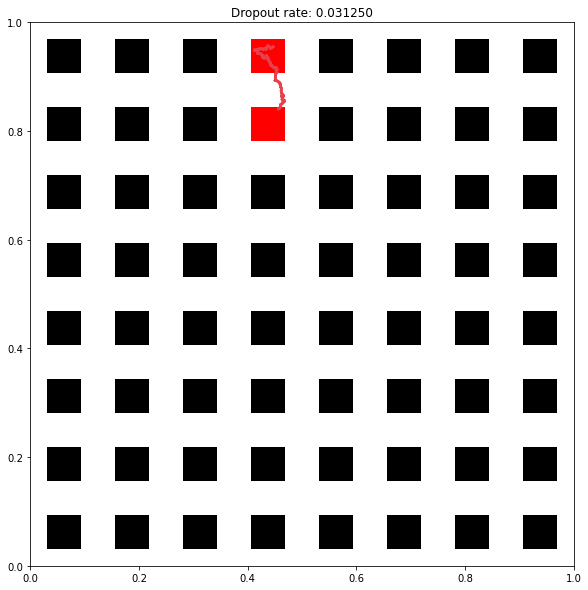

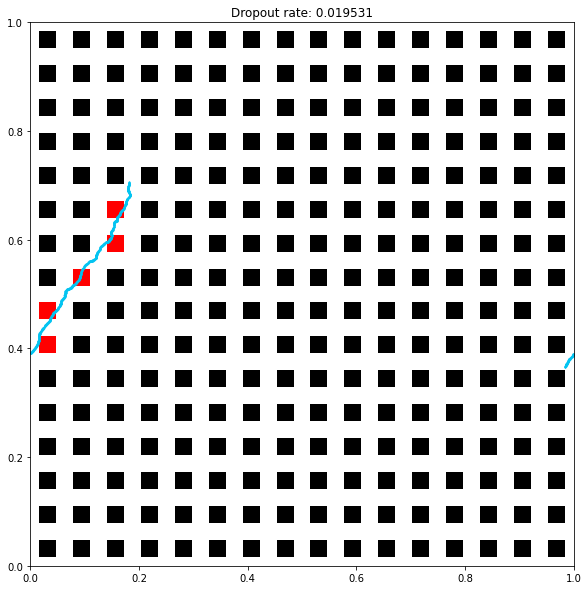

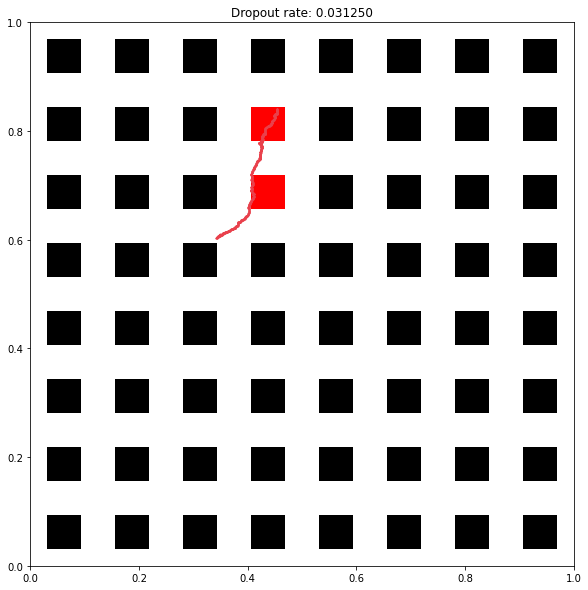

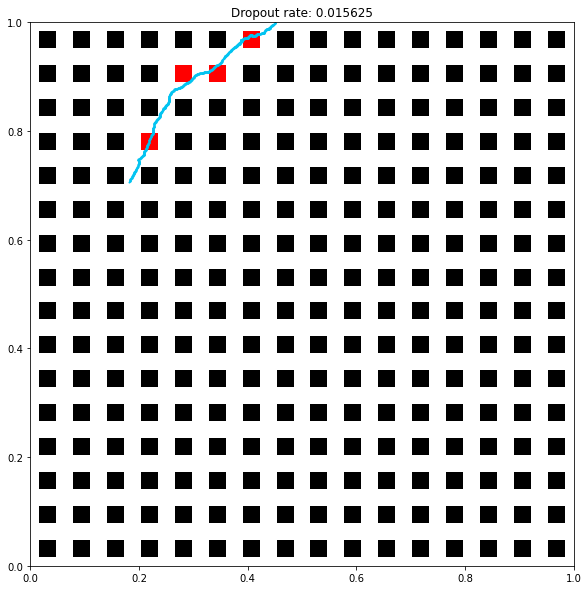

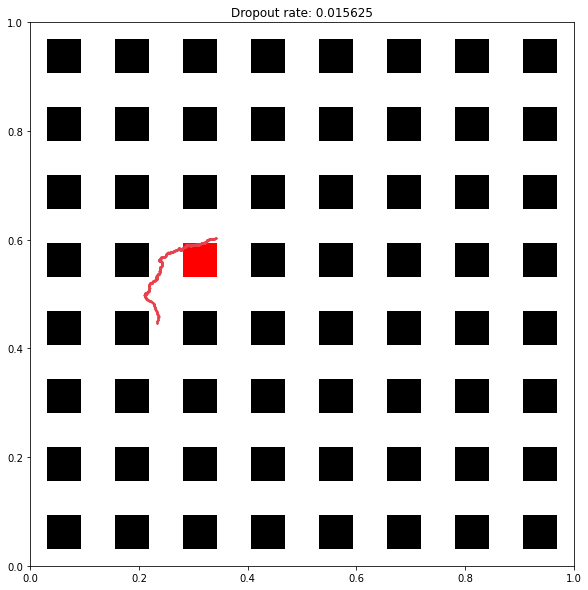

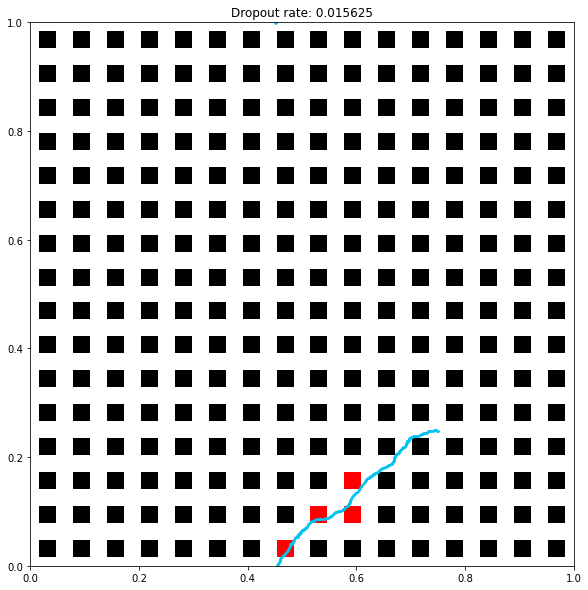

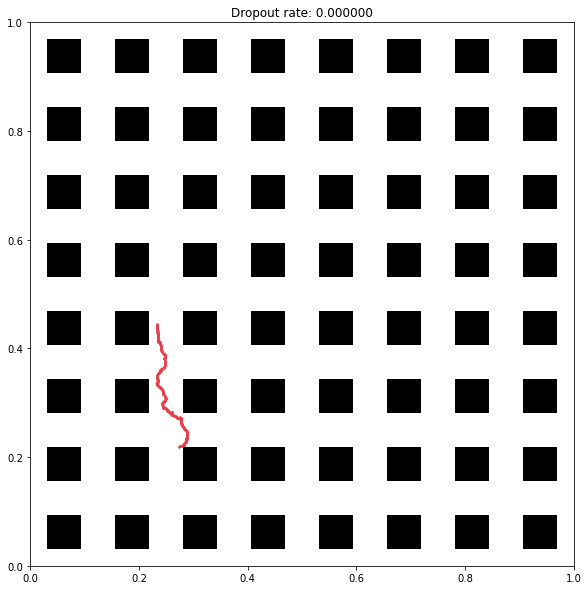

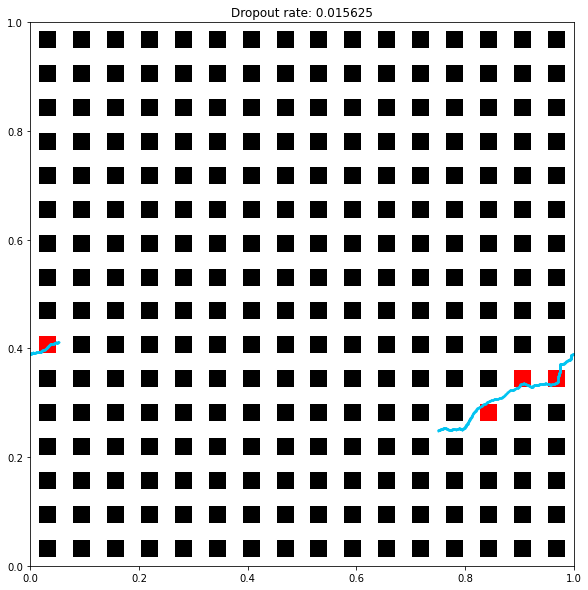

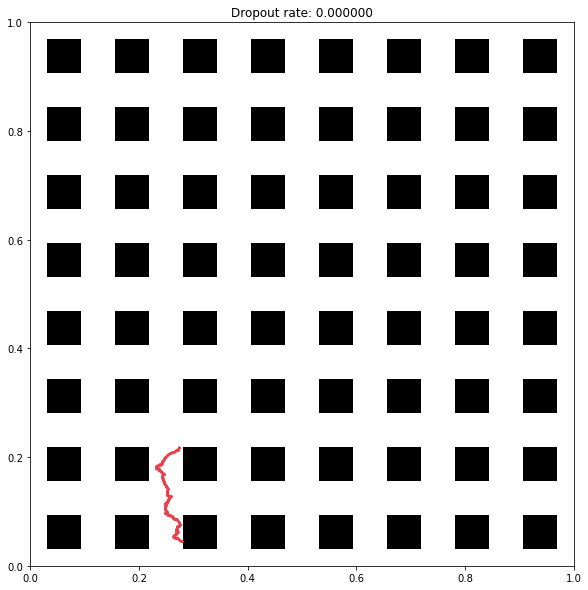

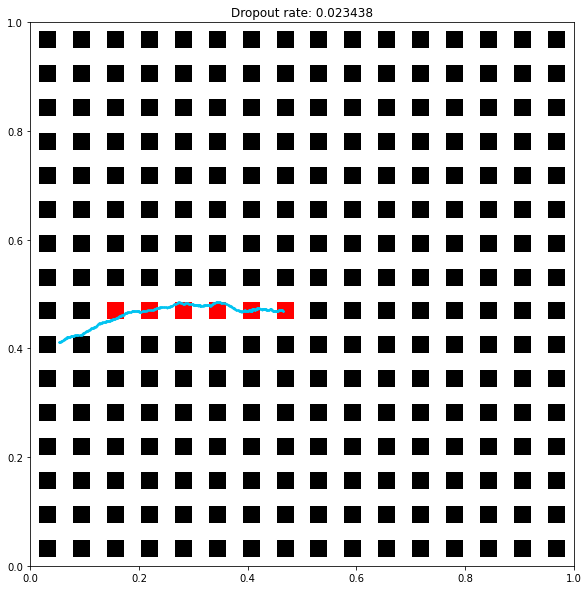

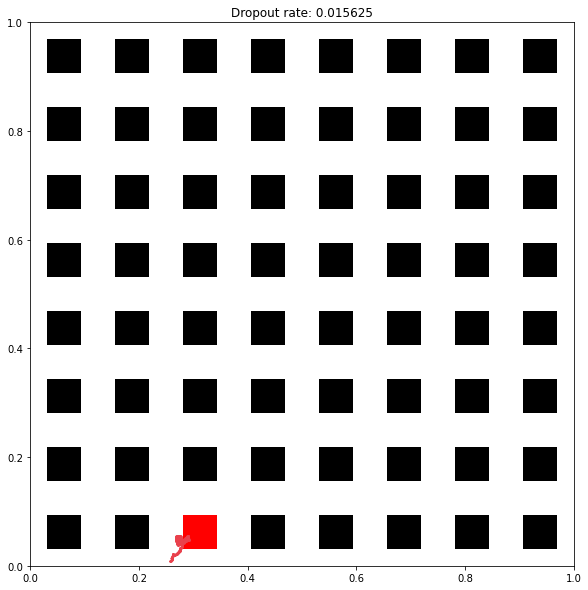

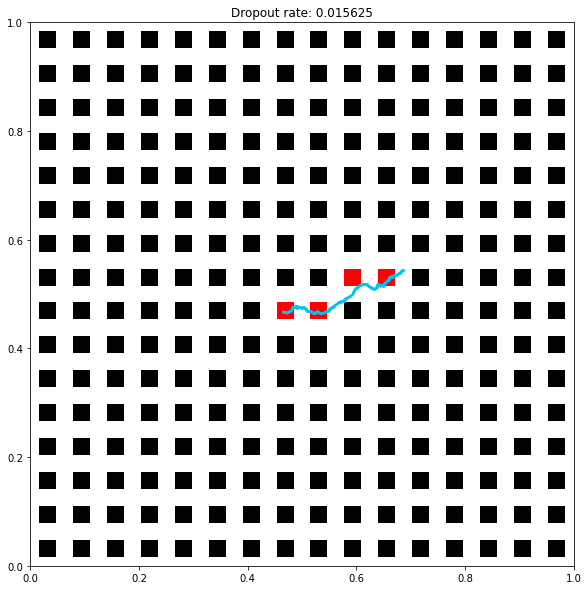

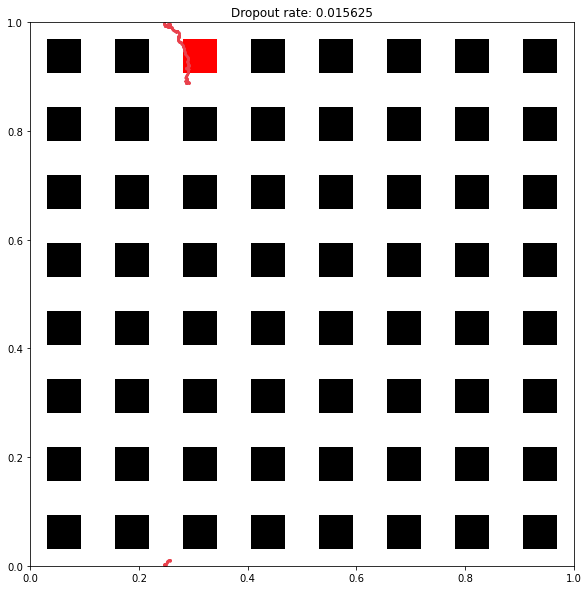

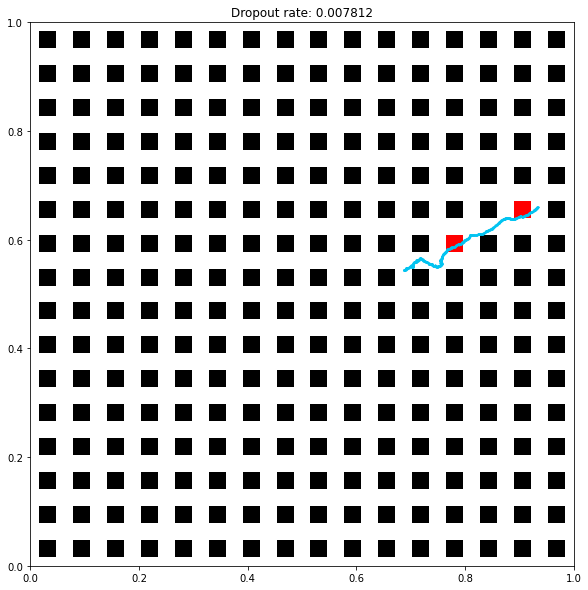

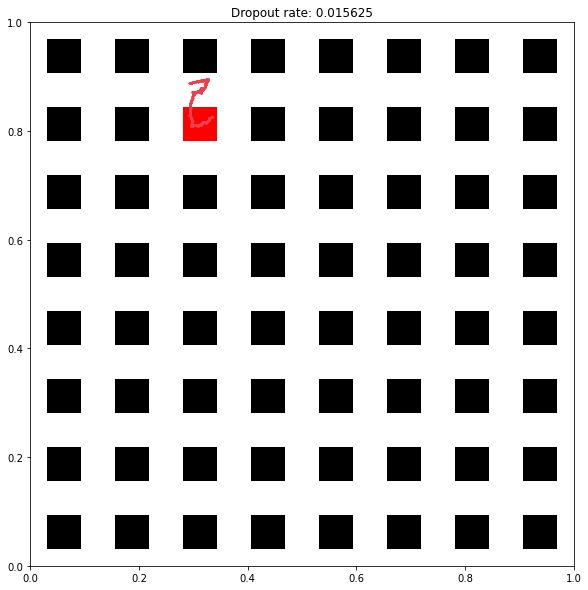

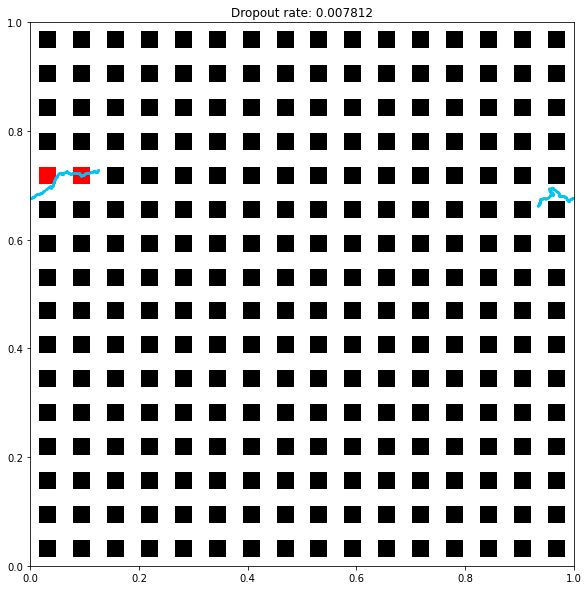

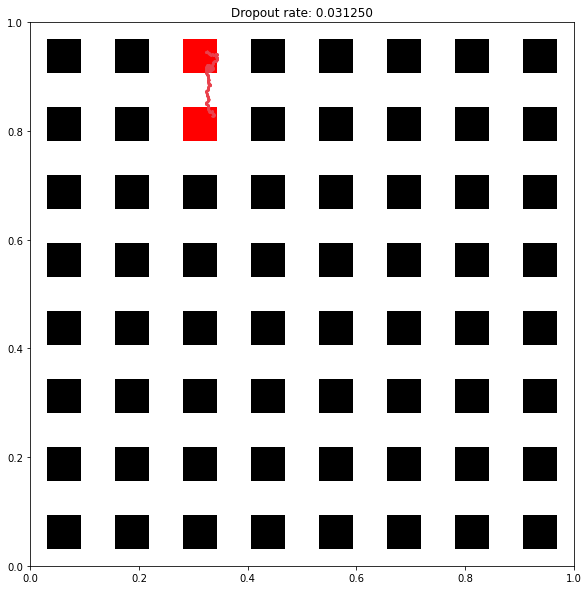

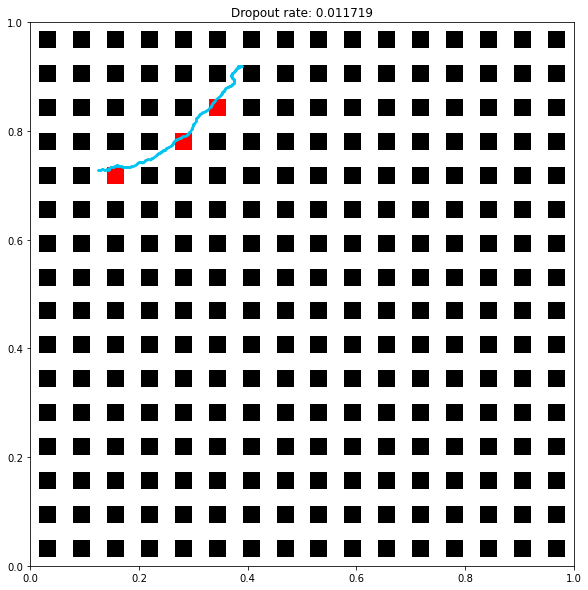

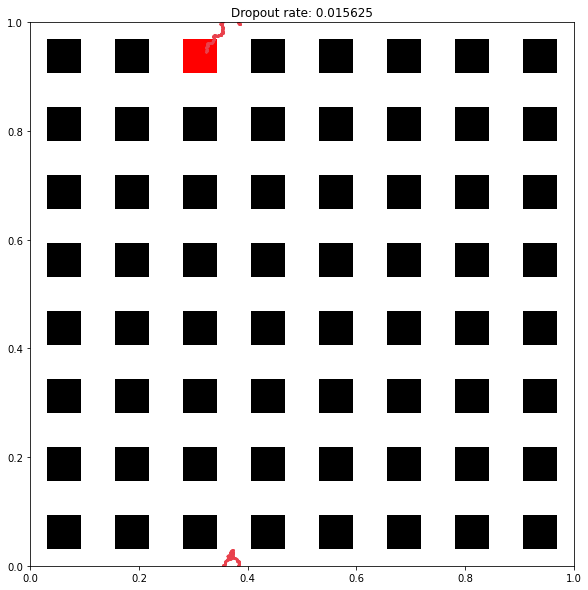

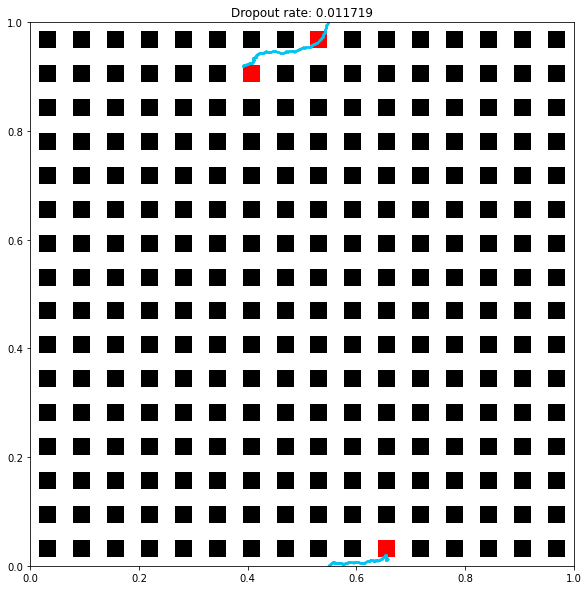

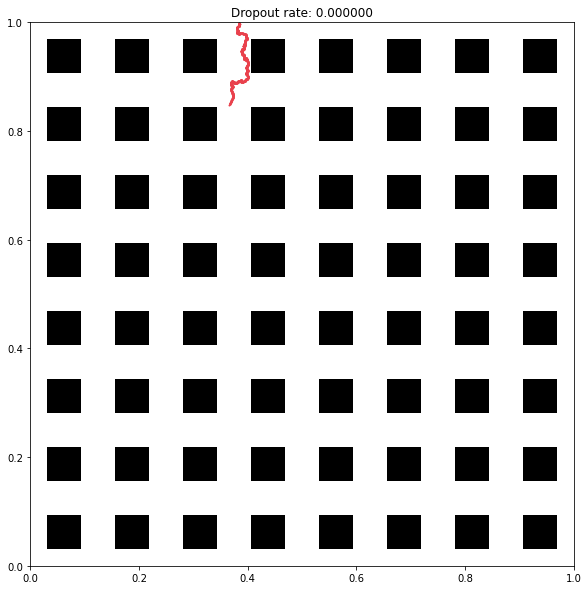

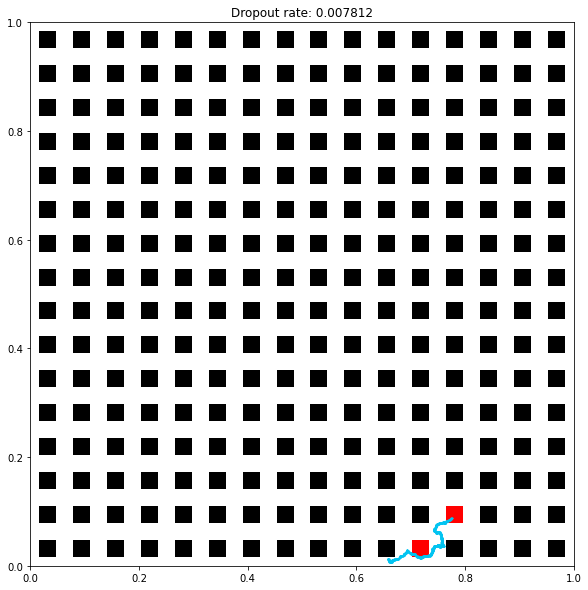

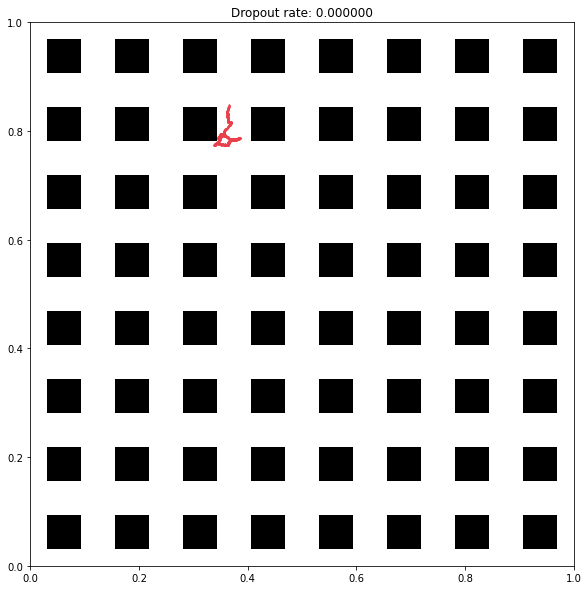

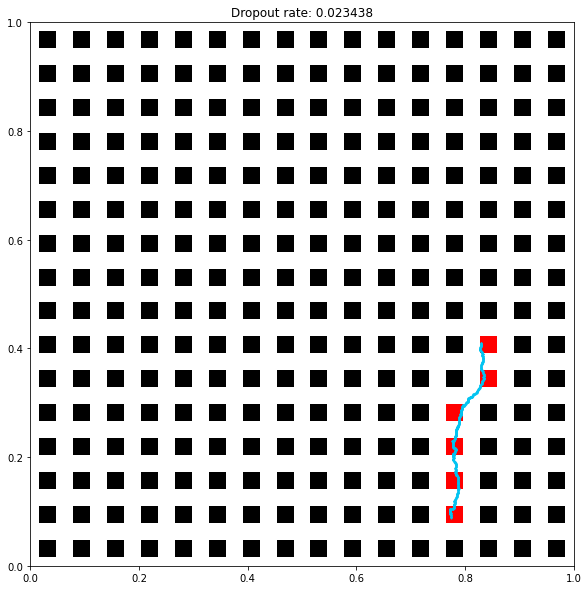

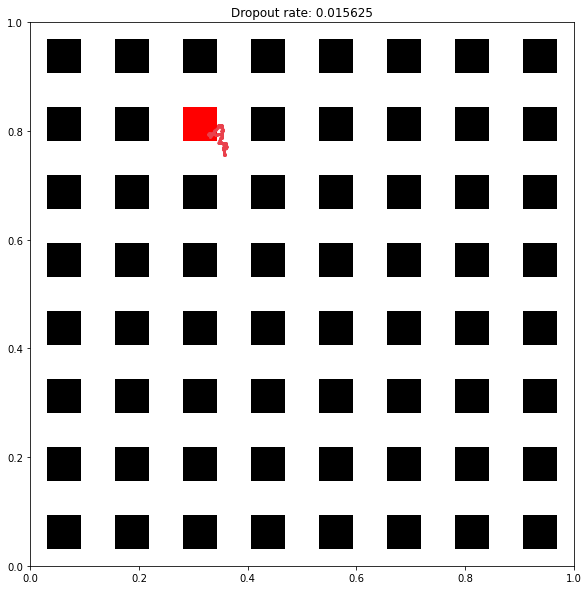

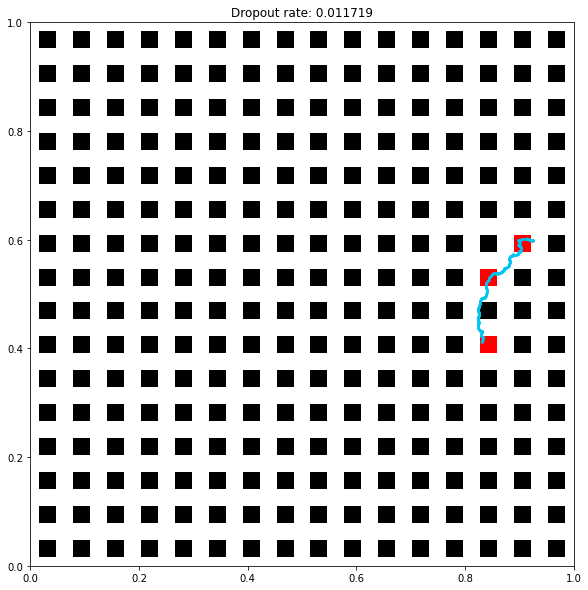

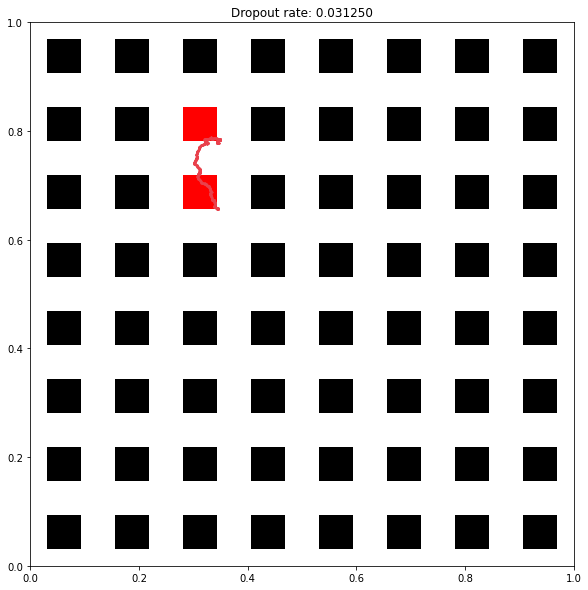

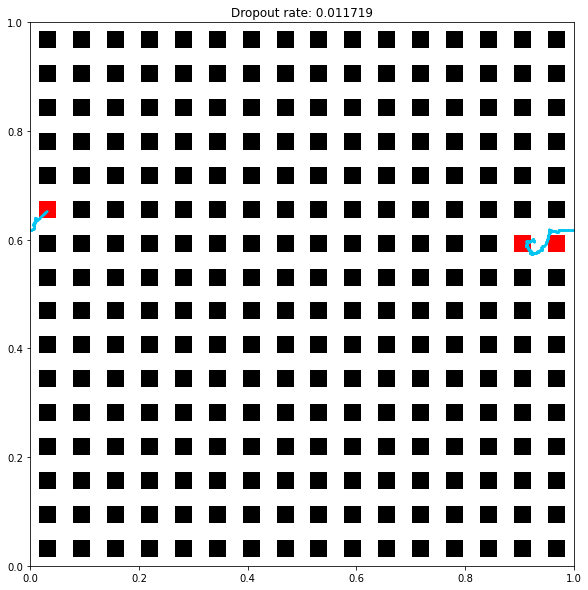

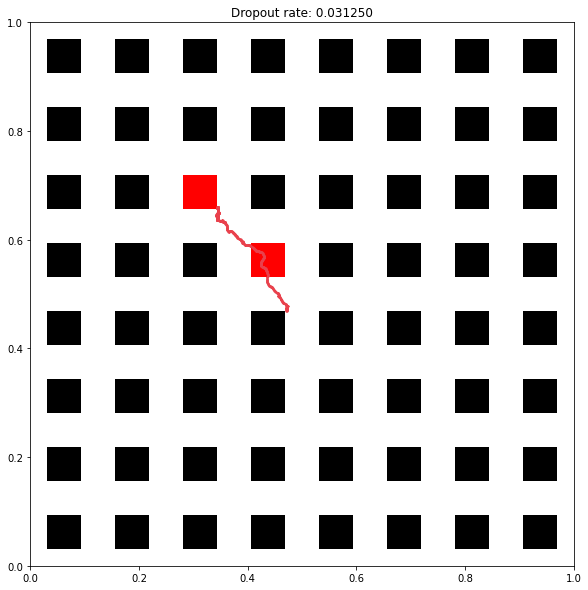

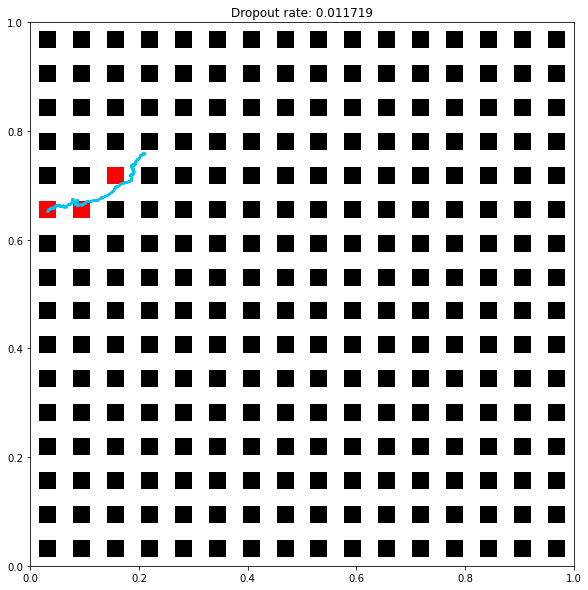

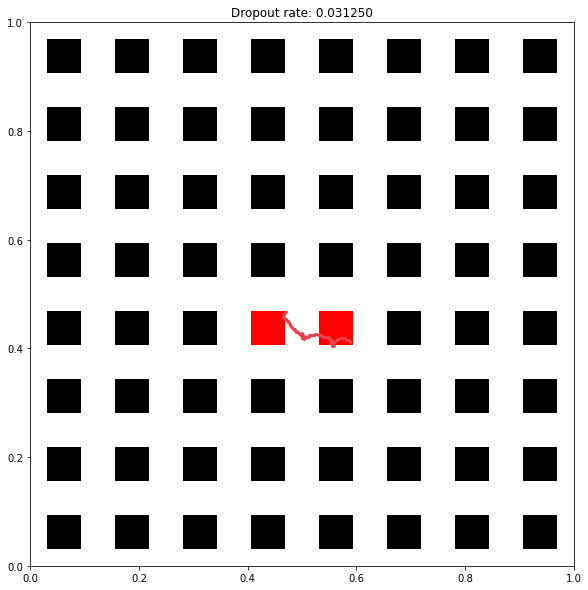

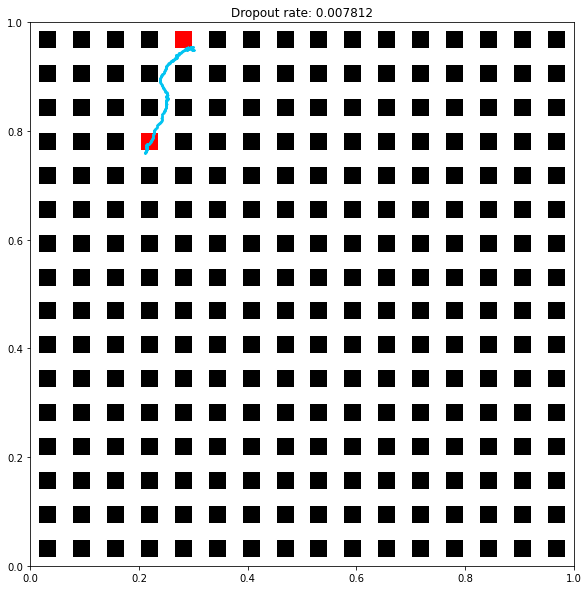

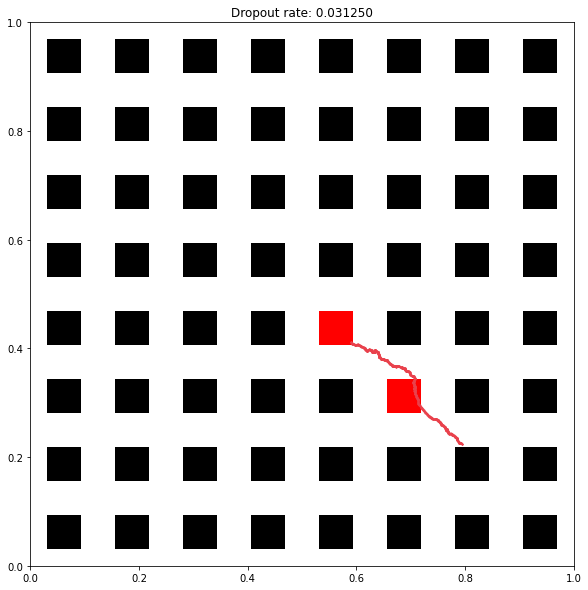

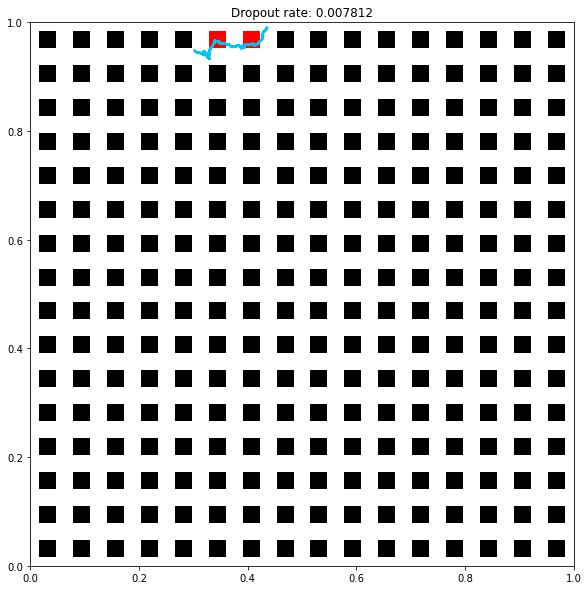

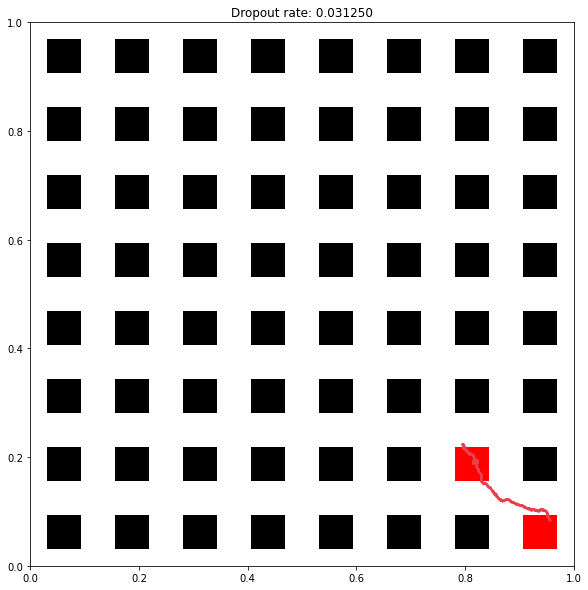

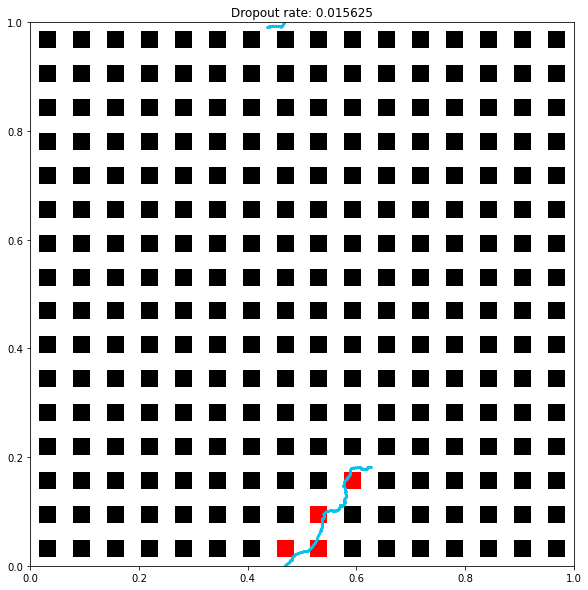

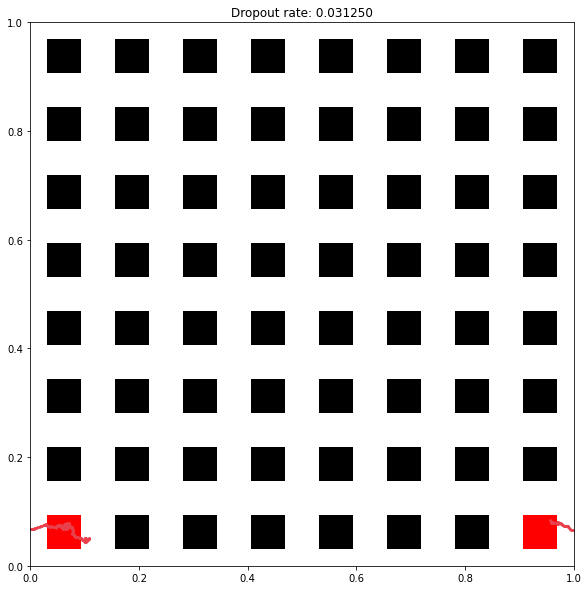

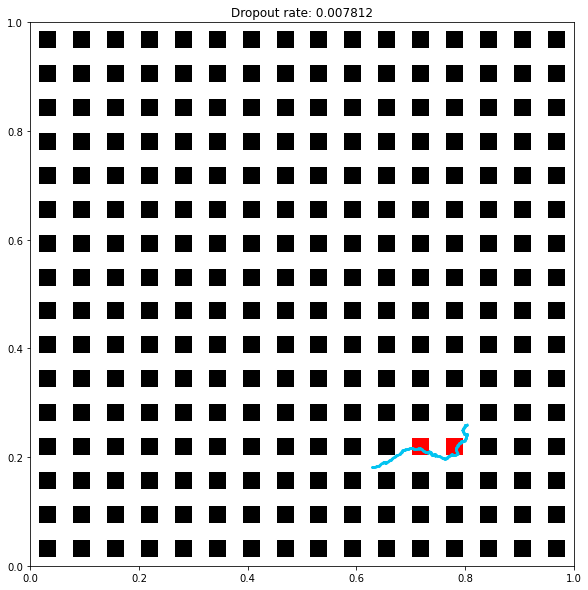

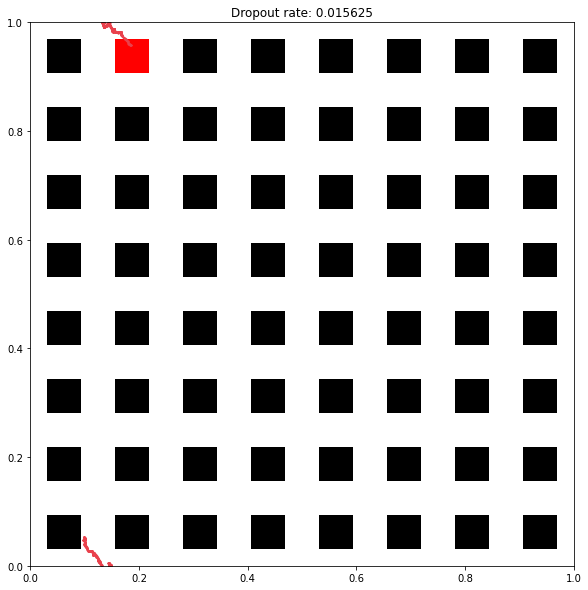

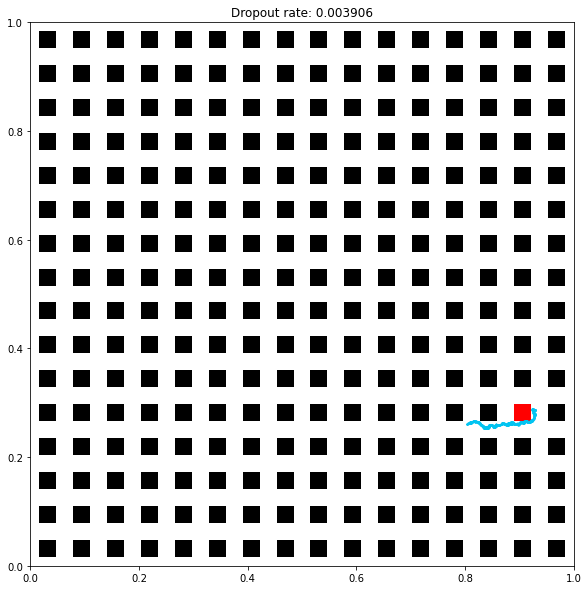

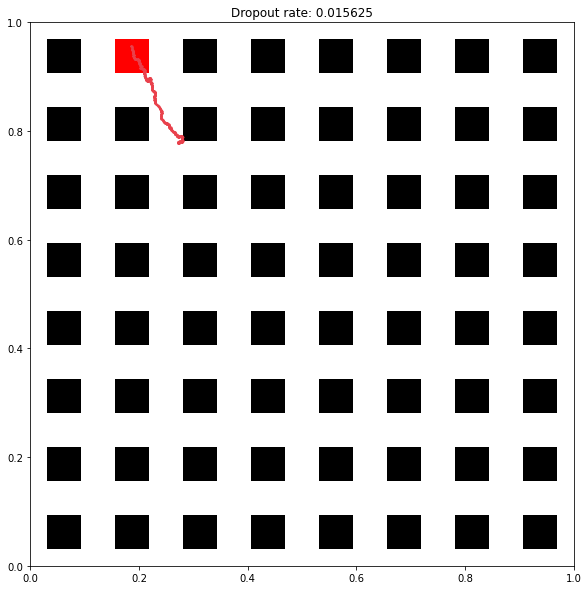

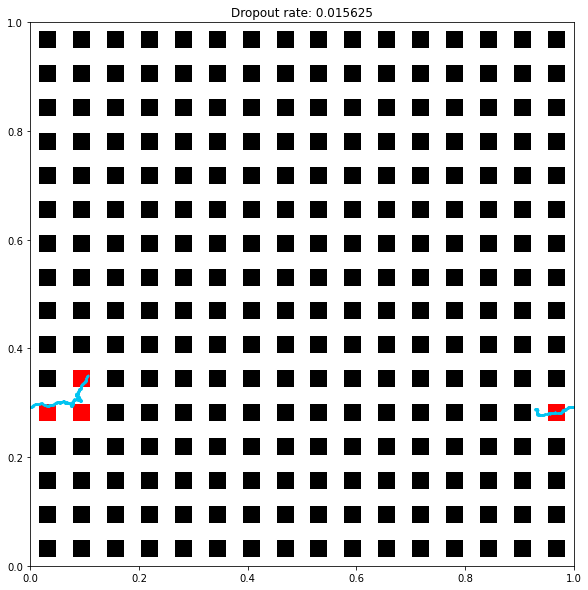

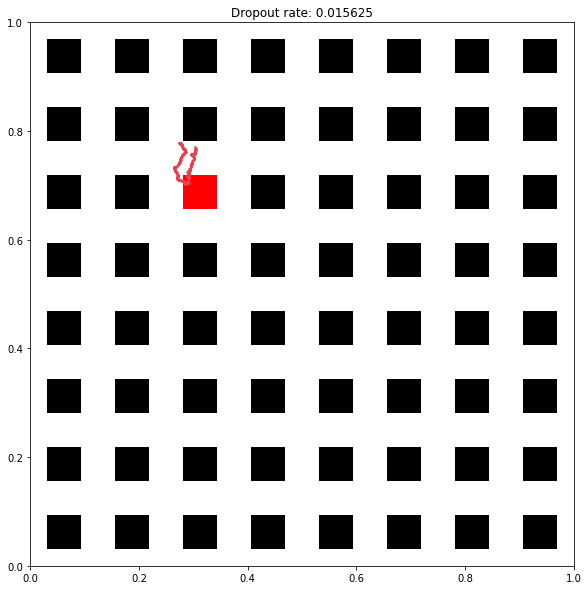

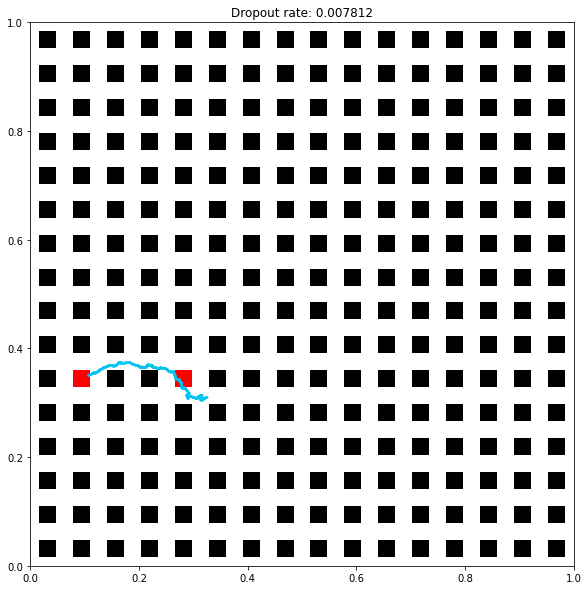

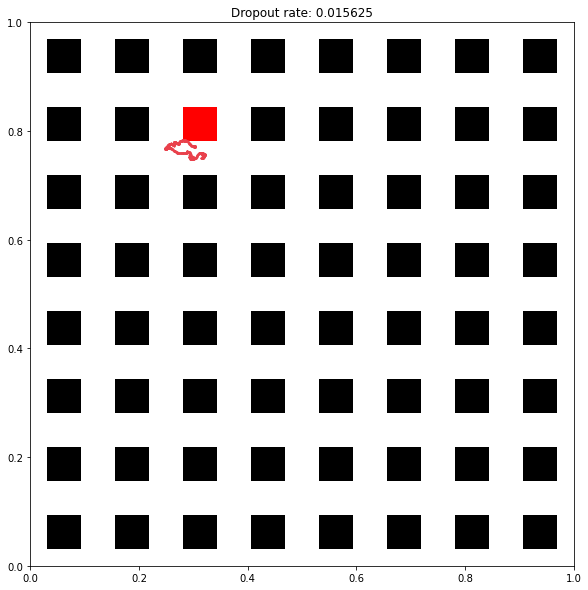

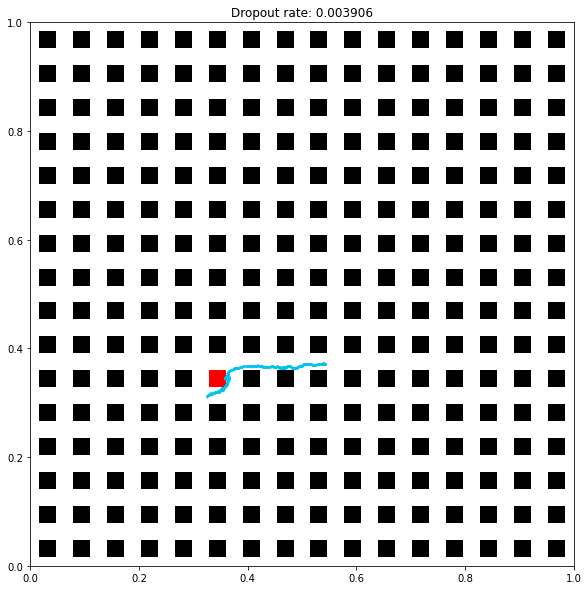

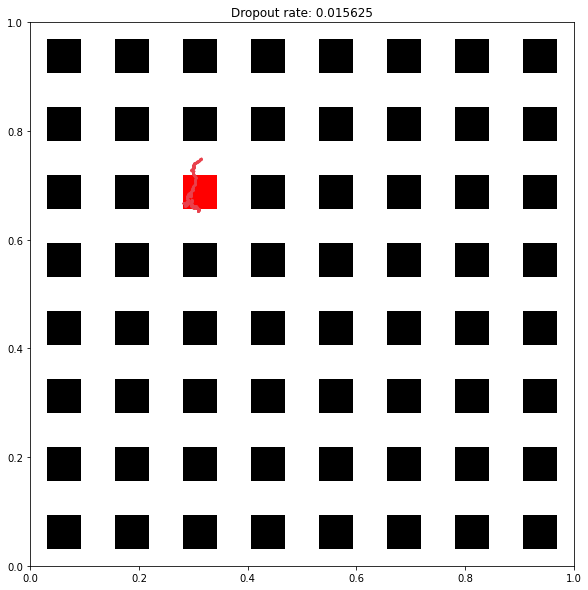

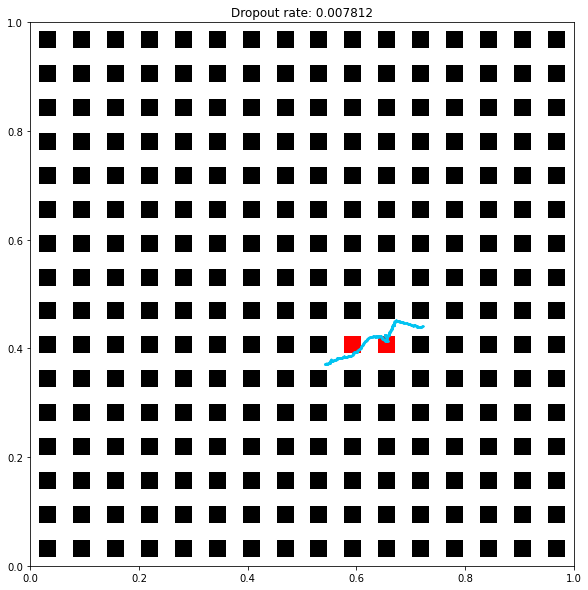

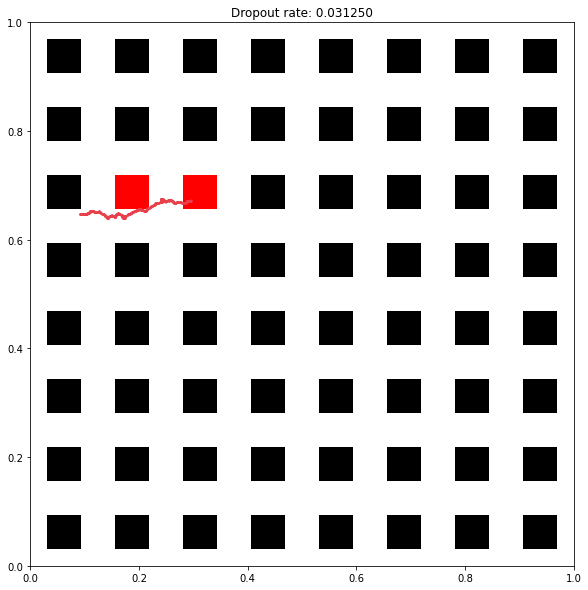

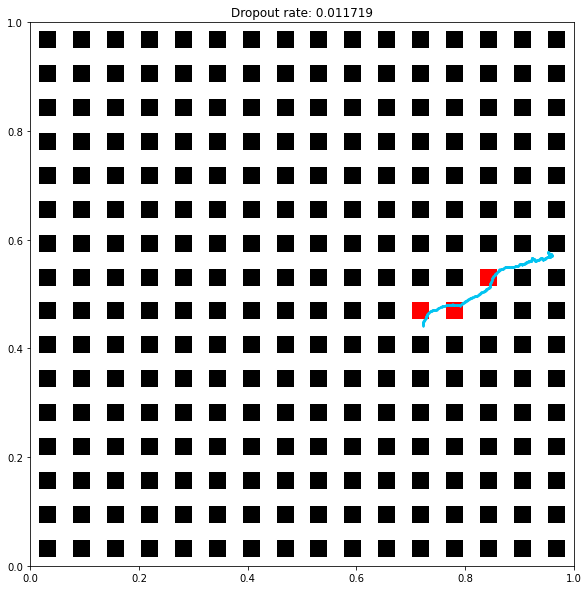

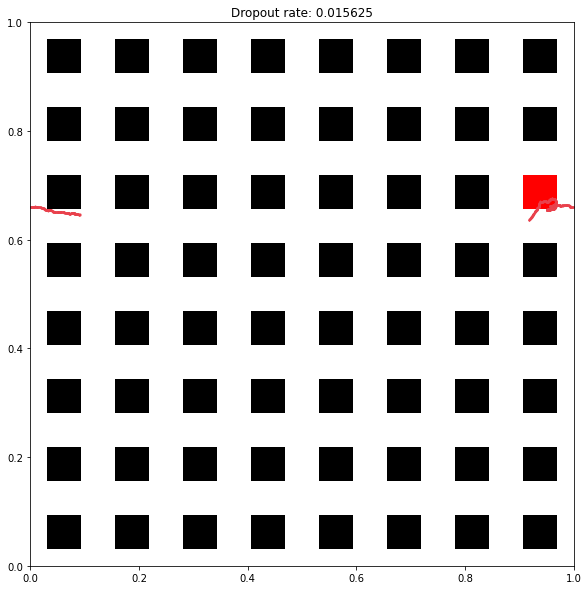

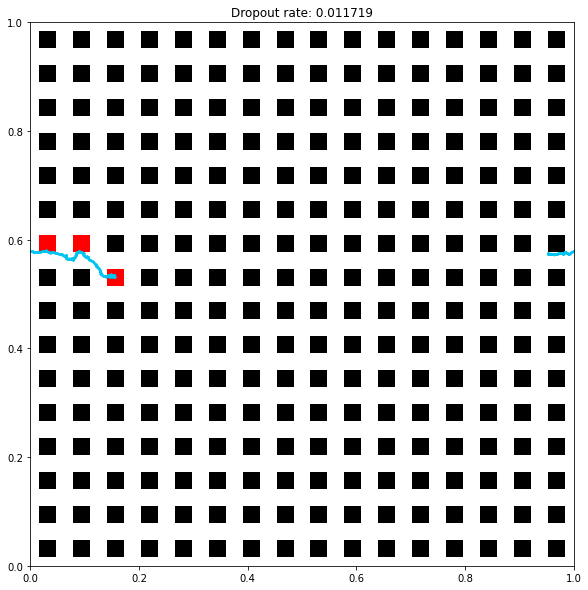

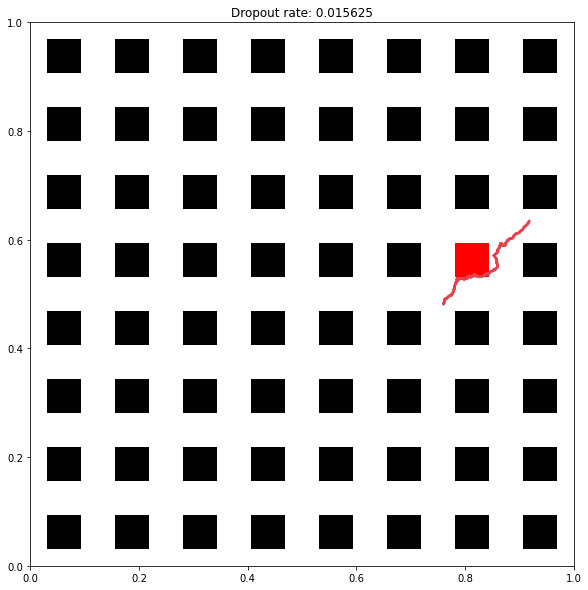

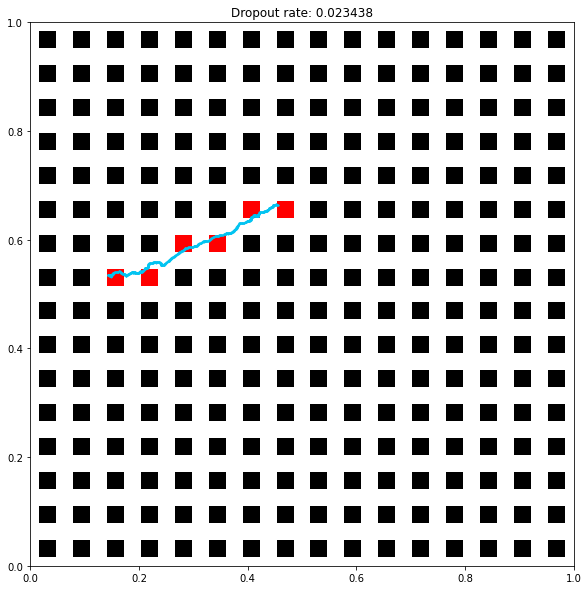

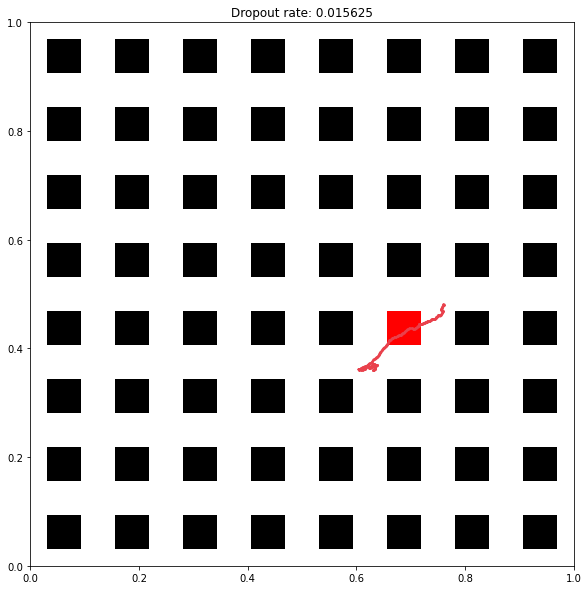

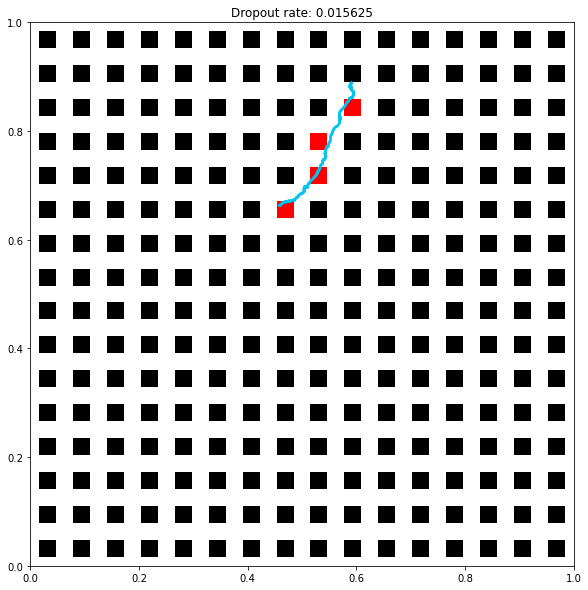

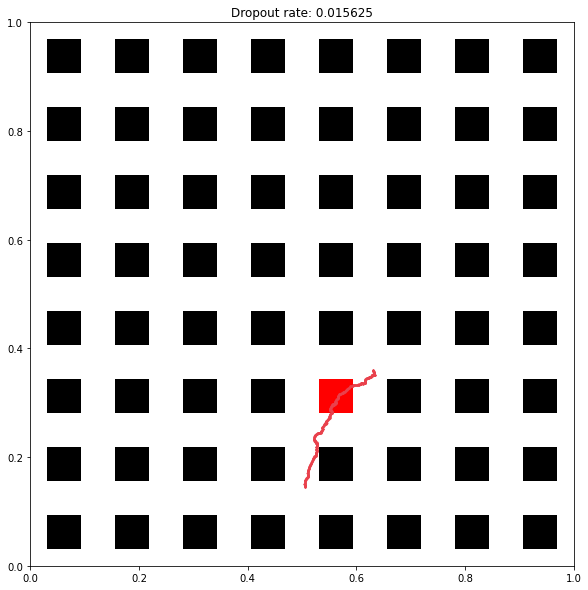

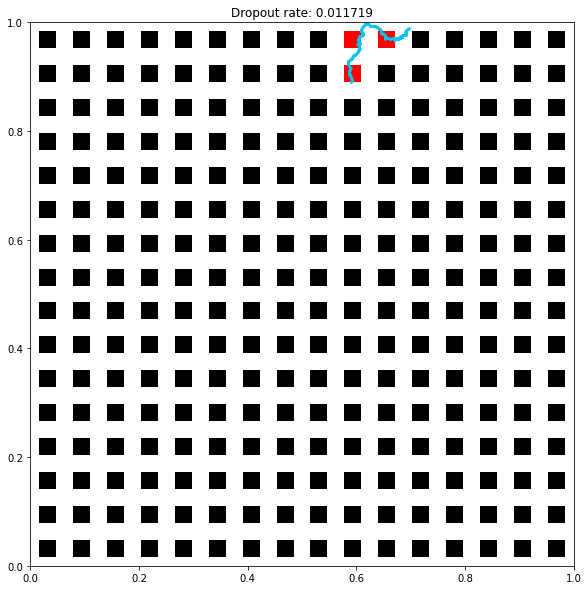

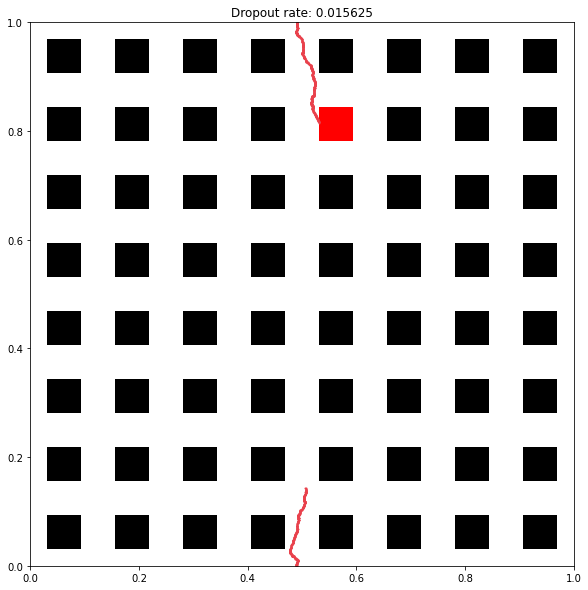

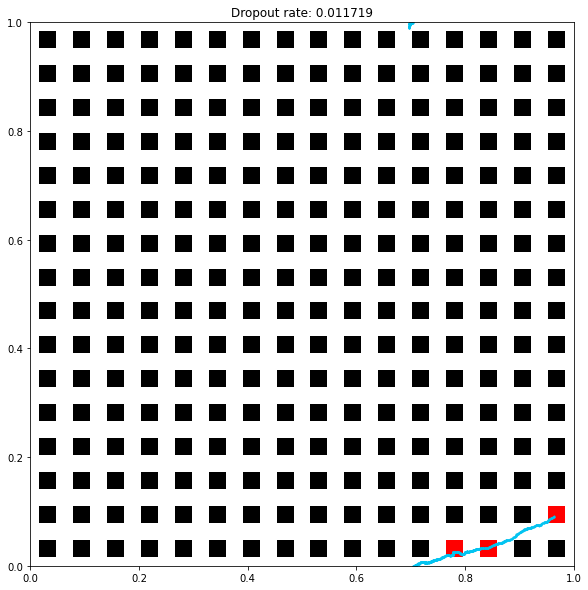

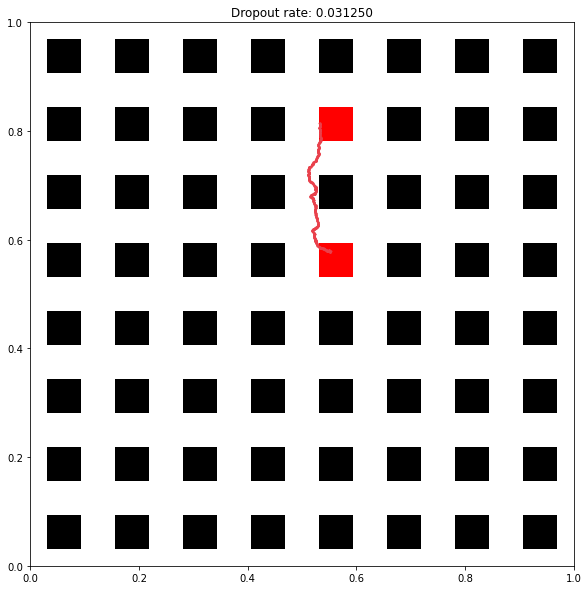

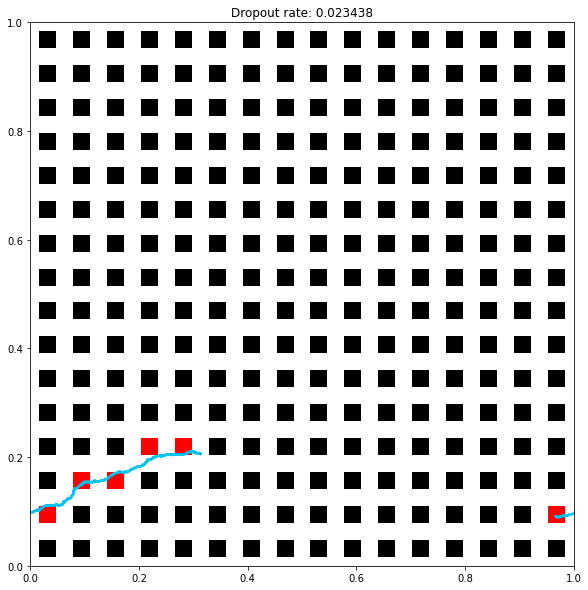

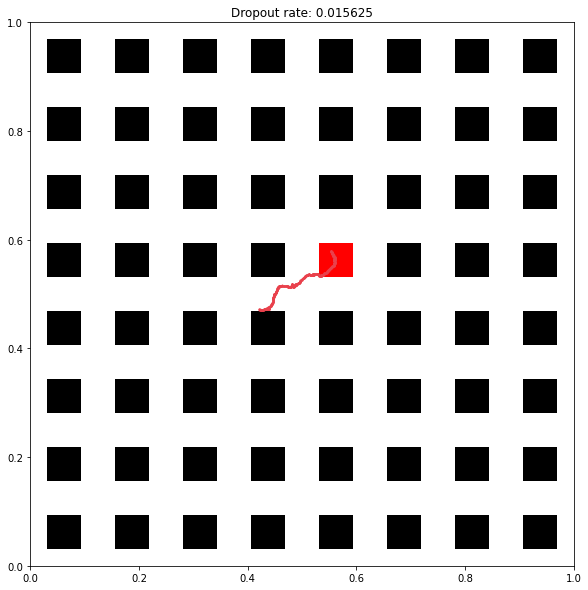

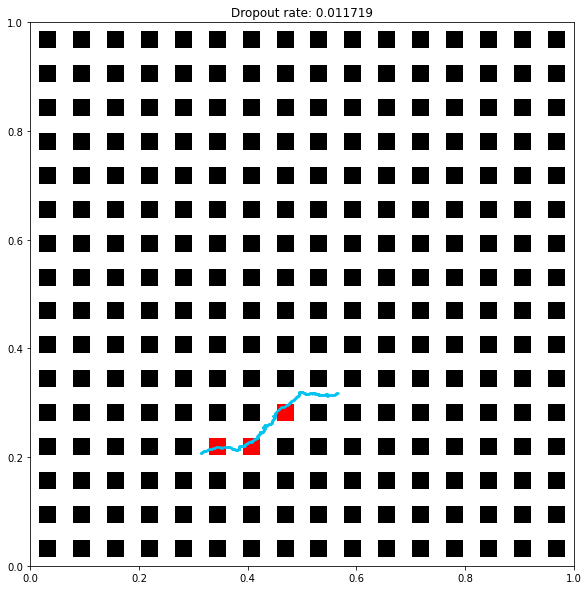

KeyboardInterrupt: 

In [4]:
n_iter = 0
for epoch in range(1):
    model_fbm_dropout.train()

    running_loss = {}
    running_loss['fbm dropout'] = 0.0
    for images, labels in train_loader:

        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        optimizer_fbm_dropout.zero_grad()
        output_fbm_dropout = model_fbm_dropout(images, n_iter)
        n_iter += 1
        loss_fbm_dropout = criterion(output_fbm_dropout, labels)
        loss_fbm_dropout.backward()
        optimizer_fbm_dropout.step()
        running_loss['fbm dropout'] += loss_fbm_dropout.item()